#### Author: Arun Ramesh, University of Houston. https://rpglab.github.io/people/Arun-Venkatesh-Ramesh/
#### Source webpage: https://rpglab.github.io/resources/FL-ML-R-SCUC_Python/
#### If you use any codes/data here for your work, please cite the following paper: 
#####       Arun Venkatesh Ramesh and Xingpeng Li, “Feasibility Layer Aided Machine Learning Approach for Day-Ahead Operations”, IEEE Transactions on Power Systems, Apr. 2023.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
np.random.seed(1)

import sys
nums = np.arange(2000)
np.set_printoptions(threshold=sys.maxsize)

import csv
import time
from timeit import default_timer as timer

In [14]:
dfX_24 = pd.read_csv("demandPolishBusWBCorr24Prd_merged.txt")
dfY_24 = pd.read_csv("commitmentPolishBusWBCorr24Prd_merged.txt")

print(dfX_24.info)
print(dfY_24.info)

<bound method DataFrame.info of       0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  9.120678027397052  ...  \
0     0    0    0    0    0    0    0    0    0           7.582134  ...   
1     0    0    0    0    0    0    0    0    0           7.273398  ...   
2     0    0    0    0    0    0    0    0    0           8.909061  ...   
3     0    0    0    0    0    0    0    0    0           7.850933  ...   
4     0    0    0    0    0    0    0    0    0           8.168188  ...   
...  ..  ...  ...  ...  ...  ...  ...  ...  ...                ...  ...   
1270  0    0    0    0    0    0    0    0    0           8.796594  ...   
1271  0    0    0    0    0    0    0    0    0           9.169002  ...   
1272  0    0    0    0    0    0    0    0    0           7.594006  ...   
1273  0    0    0    0    0    0    0    0    0           9.271761  ...   
1274  0    0    0    0    0    0    0    0    0           7.215124  ...   

      7.564234454843639.5  8.668502258470447.23  17.337004516940894

In [15]:
#Without validation 

x = dfX_24.to_numpy()
#x = np.delete(x,0,1) #delete column one sample number
x = x/100
#print(x[1])

y = dfY_24.to_numpy()
#y = np.delete(y,0,1) #delete column one sample number
#print(y[1])

# Shuffle (x, y) in unison as the later parts of x will almost all be larger digits.
indices = np.arange(len(y))
np.random.shuffle(indices)
x = x[indices]
y = y[indices]

# Explicitly set apart 20% for validation data that we never train over.
split_at = len(x) - len(x) // 5
(x_train, x_test) = x[:split_at], x[split_at:]
(y_train, y_test) = y[:split_at], y[split_at:]


print(len(x_train))
print(len(y_train))

print(len(x_test))
print(len(y_test))

print(indices)

1020
1020
255
255
[ 279  586 1042  292  687    6  232  784  116    4   79  342  874  714
 1070  823 1183  503 1027  969  913  974 1228  764  646  306  971  314
  307 1201  297 1222  145 1244  247  546  397  723  499  533 1008   97
  612  670  873  850 1188  480  311   40  147  275  839  605  552   50
 1097  302  584  438 1107 1209  816  738  905  195 1136  477  668  538
  693  598 1010  855  203  395  899  516  574  966  949 1168  838   28
  379   81 1225  107  218  547  170  102  517  889  730  769  312  982
  572  601  787  655  471 1076 1041   74  317 1056  318 1217  642  837
  802  912  736  799 1129  978  996  304  187  280  439 1193 1120  620
  326 1194 1012  457 1021  970 1270 1233  321  117  746   65  449  950
  860  431  817  658  694 1254  703  753  890  778  806  812  623   20
  875  403   86 1160 1032  171 1207  366 1045 1060  877  543  914  442
 1002 1139 1044  205  885  177 1108  897  519  291 1178  228 1223  749
  921  381 1145  602  695  108  564  589  943   17 1192  11

In [8]:
# #With Validation
# dfX_24 = pd.read_csv("demandPolish24Prd.txt")
# dfY_24 = pd.read_csv("commitmentPolish24Prd.txt")

# print(dfX_24.info)
# print(dfY_24.info)

# x = dfX_24.to_numpy()
# #x = np.delete(x,0,1) #delete column one sample number
# x = x/100
# print(x.shape)

# y = dfY_24.to_numpy()
# #y = np.delete(y,0,1) #delete column one sample number
# print(y.shape)

# # Shuffle (x, y) in unison as the later parts of x will almost all be larger digits.
# indices = np.arange(len(y))
# np.random.shuffle(indices)
# x = x[indices]
# y = y[indices]
# print(indices)

# # Explicitly set apart 10% for test and cross-validation data that we never train over.
# split_at1 = len(x) - len(x) // 5
# split_at2 = len(x) - len(x) // 10

# print(split_at1)
# print(split_at2)

# (x_train, x_test, x_valid) = x[:split_at1], x[split_at1:split_at2], x[split_at2:] 
# (y_train, y_test, y_valid) = y[:split_at1], y[split_at1:split_at2], y[split_at2:] 

# print(len(x_train))
# print(len(y_train))

# print(len(x_test))
# print(len(y_test))

# print(len(x_valid))
# print(len(y_valid))

# print(x_train.shape)
# print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)

# print(x_valid.shape)
# print(y_valid.shape)

<bound method DataFrame.info of       0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  7.905830561605573  ...  \
0     0    0    0    0    0    0    0    0    0           6.572216  ...   
1     0    0    0    0    0    0    0    0    0           8.900256  ...   
2     0    0    0    0    0    0    0    0    0           9.012405  ...   
3     0    0    0    0    0    0    0    0    0           6.304603  ...   
4     0    0    0    0    0    0    0    0    0           8.239435  ...   
...  ..  ...  ...  ...  ...  ...  ...  ...  ...                ...  ...   
1194  0    0    0    0    0    0    0    0    0           7.647055  ...   
1195  0    0    0    0    0    0    0    0    0           6.794366  ...   
1196  0    0    0    0    0    0    0    0    0           6.151830  ...   
1197  0    0    0    0    0    0    0    0    0           6.246997  ...   
1198  0    0    0    0    0    0    0    0    0           7.678793  ...   

      6.622451770893346.2  7.58947486178368.10  15.178160960850482.

In [16]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros(shape=(dim,7848))
    b = np.zeros(shape=(1,7848))
    return w, b

In [17]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1. / ( 1 + np.exp(-z))
    return s

In [18]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    
    m = X.shape[0]
    
    #print(m)
    
    #print(w.shape)
    #print(X.shape)
    #print(b)
    #b = np.sum(b)
    b = b.T 
    #print(b)
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)             # compute activation
    #print(A.shape)
    #print(Y.shape)
    cost = (-1. / m) * np.sum((Y*np.log(A) + (1 - Y)*np.log(1-A)), axis=1)    # compute cost
    #print(cost.shape)
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis=1)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == (7848,))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [19]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate*dw
        b = b -  learning_rate*db
        
        # Record the costs
        #if i % 10 == 0:
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        #if print_cost and i % 100 == 0:
        #    print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [20]:
def predict(w, b, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    """
    
    m = X.shape[1]
    #Y_prediction = np.zeros((792, m))
    w = w.reshape(X.shape[0], 7848)
    #b = np.sum(b)
    b = b.T
    
    # Compute vector "A" predicting the probabilities commitment
    A = sigmoid(np.dot(w.T, X) + b)
    #print (A.shape)
    #print(A.T)        
    return A

In [21]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [22]:
x_train = x_train.T
y_train = y_train.T

x_test = x_test.T
y_test = y_test.T

#x_valid = x_valid.T
#y_valid = y_valid.T

In [23]:
print (x_train.shape)
print (y_train.shape)

learning_rates = [0.001, 0.003, 0.005, 0.008, 0.01, 0.03, 0.05]


models = {}
for i in learning_rates:
    start = timer()
    print ("learning rate is: ",i)
    models[i] = model(x_train, y_train, x_test, y_test, num_iterations = 1000, learning_rate = i, print_cost = True)
    end = timer()
    print("training time: ",end - start)
    print ("-------------------------------------------------------")

(57192, 1020)
(7848, 1020)
learning rate is:  0.001
train accuracy: 93.83442022233957 %
test accuracy: 93.93044459133897 %
training time:  7154.920089200001
-------------------------------------------------------
learning rate is:  0.003
train accuracy: 96.27876075280524 %
test accuracy: 96.37596622014648 %
training time:  7142.0733397999975
-------------------------------------------------------
learning rate is:  0.005
train accuracy: 96.7580518107498 %
test accuracy: 96.8549202829927 %
training time:  7144.007685500001
-------------------------------------------------------
learning rate is:  0.008
train accuracy: 97.02416223606645 %
test accuracy: 97.12066474796906 %
training time:  7145.163893199999
-------------------------------------------------------
learning rate is:  0.01
train accuracy: 97.1120774877771 %
test accuracy: 97.20840970438057 %
training time:  7148.545746200005
-------------------------------------------------------
learning rate is:  0.03
train accuracy: 97.344

In [17]:
npindice = np.reshape(indices, (1,1499))
with open("indiceshorizontal.csv","w+",newline="") as my_csv: #index(indices) 1201-1500 test case 299 samples
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(npindice) 
with open("indicesvertical.csv","w+",newline="") as my_csv: #index(indices) 1201-1500 test case 299 samples
    csvWriter = csv.writer(my_csv,delimiter='\n')
    csvWriter.writerows(npindice) 

In [24]:
#print(indices)

for i in learning_rates:
    print ("learning rate is: ",i)
    w = models[i]["w"]
    b = models[i]["b"]
    A_prediction_test = predict(w, b, x_test)
    A_prediction_test = A_prediction_test.T
    
    m = A_prediction_test.shape[0]
    Y_test_hackFull = np.zeros((m,A_prediction_test.shape[1]))
    P = 0.5

    for j in range(m):
        for i in range(A_prediction_test.shape[1]):
        
            # Convert probabilities A[0,i] to actual predictions p[0,i]
            if A_prediction_test[j, i] >= P:
                Y_test_hackFull[j, i] = 1
            
            else:
                Y_test_hackFull[j, i] = 0
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_test.T - Y_test_hackFull)) * 100))
    
    A_prediction_train = predict(w, b, x_train)
    A_prediction_train = A_prediction_train.T
    
    m = A_prediction_train.shape[0]
    Y_train_hackFull = np.zeros((m,A_prediction_train.shape[1]))
    
    for j in range(m):
        for i in range(A_prediction_train.shape[1]):
        
            # Convert probabilities A[0,i] to actual predictions p[0,i]
            if A_prediction_train[j, i] >= P:
                Y_train_hackFull[j, i] = 1
            
            else:
                Y_train_hackFull[j, i] = 0
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_train.T - Y_train_hackFull)) * 100))
    print ("-------------------------------------------------------")
    
    

learning rate is:  0.001
test accuracy: 98.26567528132558 %
train accuracy: 98.1268363614559 %
-------------------------------------------------------
learning rate is:  0.003
test accuracy: 98.26567528132558 %
train accuracy: 98.1268363614559 %
-------------------------------------------------------
learning rate is:  0.005
test accuracy: 98.26567528132558 %
train accuracy: 98.1268363614559 %
-------------------------------------------------------
learning rate is:  0.008
test accuracy: 98.26567528132558 %
train accuracy: 98.1268363614559 %
-------------------------------------------------------
learning rate is:  0.01
test accuracy: 98.26567528132558 %
train accuracy: 98.1268363614559 %
-------------------------------------------------------
learning rate is:  0.03
test accuracy: 98.26842357738202 %
train accuracy: 98.1298719793728 %
-------------------------------------------------------
learning rate is:  0.05
test accuracy: 98.28871099918051 %
train accuracy: 98.15028432371929 %
-

In [34]:
i = 0.05
print ("learning rate is: ",i)
w = models[i]["w"]
b = models[i]["b"]
A_prediction_test = predict(w, b, x_test)
A_prediction_test = A_prediction_test.T
    
m = A_prediction_test.shape[0]
Y_test_hackFull = np.zeros((m,A_prediction_test.shape[1]))
P = 0.7

for j in range(m):
    for k in range(A_prediction_test.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A_prediction_test[j, k] >= P:
            Y_test_hackFull[j, k] = 1
            
        else:
            Y_test_hackFull[j, k] = 0
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_test.T - Y_test_hackFull)) * 100))
    
A_prediction_train = predict(w, b, x_train)
A_prediction_train = A_prediction_train.T
    
m = A_prediction_train.shape[0]
Y_train_hackFull = np.zeros((m,A_prediction_train.shape[1]))
    
for j in range(m):
    for k in range(A_prediction_train.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A_prediction_train[j, k] >= P:
            Y_train_hackFull[j, k] = 1
            
        else:
            Y_train_hackFull[j, k] = 0
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_train.T - Y_train_hackFull)) * 100))
print ("-------------------------------------------------------")

learning rate is:  0.05
test accuracy: 98.33523215606324 %
train accuracy: 98.1724955527573 %
-------------------------------------------------------


In [67]:
sample = 100

print(y_test.T[sample])
print(y_test.T[sample]-Y_test_hackFull[sample])
print(np.mean(Y_test_hackFull[sample]))
print(Y_test_hackFull[sample])
print(A_prediction_test[sample])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 

In [38]:
with open("commitmentPolishBus24PrdTestSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(Y_test_hackFull)

In [47]:
x_test_round = np.around(x_test, decimals=4)
x_test_round = x_test_round.T
with open("demandPolishBus24PrdTestSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(x_test_round)

In [48]:
x_test_round = np.around(x_test, decimals=4)
x_test_round = x_test_round.T

#ColindexRow = np.zeros(shape=(1,57192))

#for i in range(57192):
#    ColindexRow[0,i] = i
nColX = 57192
x_test_round_Rowindexed = np.zeros(shape=(x_test_round.shape[0] + 1,nColX+1))     
for j in range(x_test_round.shape[0]+1):
    for i in range(nColX+1):
        if j == 0:
            x_test_round_Rowindexed[j,i] = i
        else:
            if i == 0:
                x_test_round_Rowindexed[j,i] = j
            else:
                x_test_round_Rowindexed[j,i] = x_test_round[j-1,i-1]

#print (x_test_round_Rowindexed[j])

with open("demandPolish24PrdTestSample4Ampl.txt","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter='\t')
    csvWriter.writerows(x_test_round_Rowindexed)

In [46]:
A_prediction_test_round = np.around(A_prediction_test, decimals=8)
#A_prediction_test_round = A_prediction_test_round.T
with open("probabilitiesPolishBus24PrdTestSample4Ampl.txt","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter='\t')
    csvWriter.writerows(A_prediction_test_round)

In [41]:
with open("commitmentPolishBus24PrdTrainSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(Y_train_hackFull)

In [45]:
x_train_round = np.around(x_train, decimals=4)
x_train_round = x_train_round.T
with open("demandPolishBus24PrdTrainSample4Ampl.txt","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter='\t')
    csvWriter.writerows(x_train_round)

In [42]:
with open("probabilitiesPolishBus24PrdTrainSample4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(A_prediction_train)

In [43]:
with open("UgtActPolishBus24PrdTest4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(y_test.T)

In [44]:
with open("UgtActPolishBus24PrdTrain4Ampl.csv","w+",newline="") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(y_train.T)

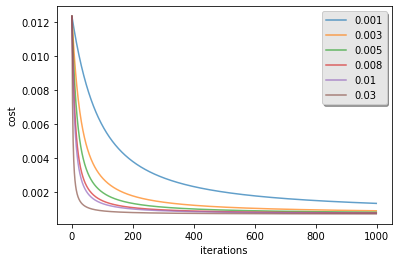

[[0.01236205 0.01224746 0.01213444 0.01202295 0.01191297 0.01180449
  0.01169748 0.01159192 0.01148779 0.01138508 0.01128375 0.0111838
  0.0110852  0.01098793 0.01089197 0.0107973  0.01070391 0.01061178
  0.01052088 0.01043121 0.01034273 0.01025544 0.01016931 0.01008433
  0.01000049 0.00991775 0.00983612 0.00975556 0.00967608 0.00959763
  0.00952023 0.00944384 0.00936845 0.00929404 0.00922061 0.00914814
  0.00907661 0.009006   0.00893631 0.00886752 0.00879962 0.00873259
  0.00866641 0.00860109 0.0085366  0.00847292 0.00841006 0.00834799
  0.0082867  0.00822619 0.00816644 0.00810743 0.00804916 0.00799162
  0.00793479 0.00787866 0.00782323 0.00776848 0.0077144  0.00766099
  0.00760822 0.0075561  0.00750461 0.00745375 0.00740349 0.00735384
  0.00730479 0.00725632 0.00720843 0.00716111 0.00711435 0.00706814
  0.00702247 0.00697734 0.00693274 0.00688866 0.00684509 0.00680202
  0.00675945 0.00671737 0.00667577 0.00663465 0.006594   0.00655381
  0.00651407 0.00647478 0.00643594 0.00639753 0.0

In [29]:
plt.clf()

NCost = int(models[0.003]["num_iterations"])#/100)

costarray_full = np.zeros((len(learning_rates),NCost))
costarray_single = np.zeros(NCost)

#print (NCost)
for i in range(6):#len(learning_rates)):
    costarray_single = np.zeros(NCost)
    for j in range(NCost):
        #print (j)
        costarray_single[j] = np.mean(np.squeeze(models[learning_rates[i]]["costs"][j])) 
    costarray_full[i] = costarray_single
    plt.plot(costarray_full[i], label= str(models[learning_rates[i]]["learning_rate"]),alpha=0.7)
    #print (np.squeeze(models[i]["costs"][2]))

#plt.plot(costarray_full[i], label= str(models[0.001]["learning_rate"]), alpha=1)
#plt.plot(np.squeeze(models[0.001]["costs"][1]), label= str(models[0.001]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='best', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

print (costarray_full)

In [37]:
print (np.squeeze(models[0.003]["costs"][1]).shape)

(2160,)


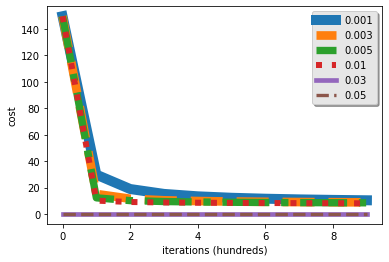

In [35]:
plt.clf()
grid=[x for x in range(10)]
i = 0
for gg,graph in enumerate(costarray_full[0:6]):
    lw=10-8*gg/len(costarray_full)
    ls=['-','--','-.',':'][gg%4]
    plt.plot(grid,graph,label=str(models[learning_rates[i]]["learning_rate"]), linestyle=ls, linewidth=lw)
    i = i+1
    
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='best', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()